<a href="https://colab.research.google.com/github/spottl1/ISDS3105_fall18/blob/master/LSUBaseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import list
from google.colab import files
from scipy.interpolate import griddata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [ ]:
# google colab file upload
upload = files.upload()

Saving Fall 2019 Data.csv to Fall 2019 Data.csv


In [ ]:
# upload LSU Fall 2019 Trackman csv file and convert it to dataframe
data = pd.read_csv('Fall 2019 Data.csv')
fall = pd.DataFrame(data)

# drop unnecessary columns from fall dataset
fall = fall.drop(columns=['PitcherTeam', 'BatterTeam', 'BatterId', 'Top/Bottom',
                          'Notes', 'HomeTeam', 'AwayTeam', 'Stadium', 'Level',
                          'League', 'GameID', 'PitchUID', 'PitcherId', 'Time'])
# create count variable combining balls and strikes
fall['Count'] = fall['Balls'].apply(str) + '-' + fall['Strikes'].apply(str)

# convert Date column to datetime object
fall['Date'] = pd.to_datetime(fall['Date'])

# isolate Month and Year from date
fall['Year'] = fall['Date'].dt.year
fall['Month'] = fall['Date'].dt.month

# drop ball and strike columns
fall = fall.drop(columns=['Balls', 'Strikes'])

# fill null values in dataset with 0's
fall = fall.fillna(0)

# create pitch start coordinate varibales
fall['PitchyStart'] = fall['PlateLocHeight'] - (fall['InducedVertBreak']/12)
fall['PitchxStart'] = fall['PlateLocSide'] - (fall['HorzBreak']/12)

In [ ]:
# strike zone construct
x1, y1 = [-8.5/12,8.5/12], [21/12,21/12]
x2, y2 = [-8.5/12,8.5/12], [41/12,41/12]
x3, y3 = [-8.5/12,-8.5/12], [21/12,41/12]
x4, y4 = [8.5/12,8.5/12], [21/12,41/12]
x5, y5 = [-14.5/12,14.5/12], [18/12,18/12]
x6, y6 = [-14.5/12,14.5/12], [44/12,44/12]
x7, y7 = [-14.5/12,-14.5/12], [18/12,44/12]
x8, y8 = [14.5/12,14.5/12], [18/12,44/12]

In [ ]:
# foul lines construct
xf1, yf1 = [-233.34524,0], [233.34524,0]
xf2, yf2 = [233.34524,0], [233.34524,0]

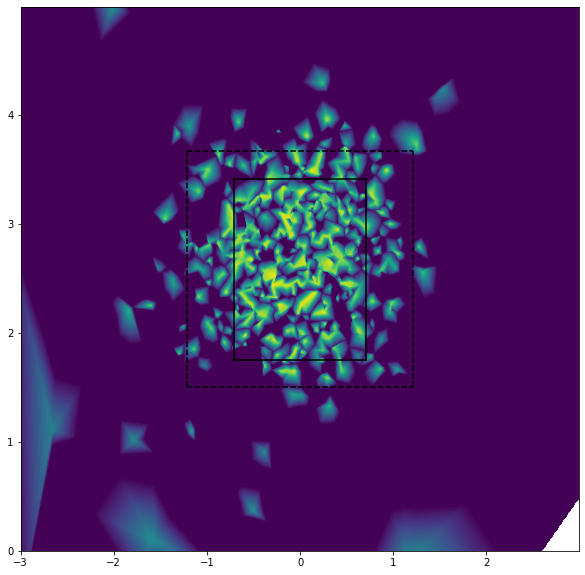

In [ ]:
# Strike Zone Contour Plot for Exit Speed
# Exit Speed describes how fast the ball comes off of the bat when struck
# use the location coordinates for contouring
# set variables for contour plot
x = fall['PlateLocSide']
y = fall['PlateLocHeight']
z = fall['ExitSpeed']

# set ranges and increments for x, y values and create meshgrid
xi = np.arange(-3,3,.01)
yi = np.arange(0,5,.01)
xi, yi = np.meshgrid(xi,yi)
zi = griddata((x,y), z, (xi,yi), method='linear')

# create contour plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.contourf(xi,yi,zi,100)
plt.plot(x1,y1,'k',x2,y2,'k',x3,y3,'k',x4,y4,'k',
         x5,y5,'k--',x6,y6,'k--',x7,y7,'k--',x8,y8,'k--')

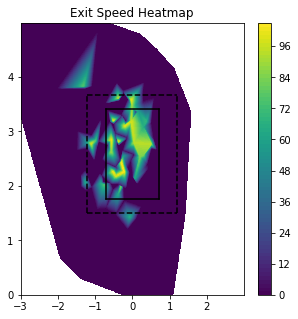

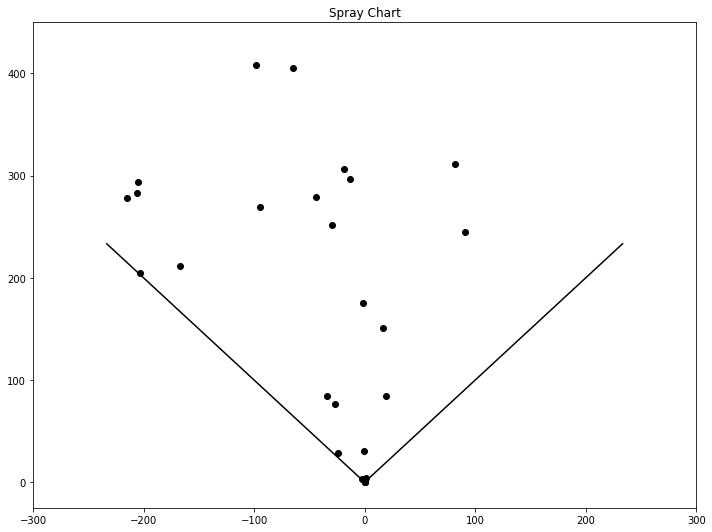

      PitchNo       Date  PAofInning  PitchofPA              Pitcher PitcherThrows        Batter BatterSide PitcherSet  Inning  Outs TaggedPitchType AutoPitchType PitchCall      KorBB     HitType PlayResult  OutsOnPlay  RunsScored   RelSpeed  VertRelAngle  HorzRelAngle     SpinRate    SpinAxis   Tilt  RelHeight   RelSide  Extension  VertBreak  InducedVertBreak  HorzBreak  PlateLocHeight  PlateLocSide  ZoneSpeed  VertApprAngle  HorzApprAngle  ZoneTime   ExitSpeed      Angle  Direction  HitSpinRate  PositionAt110X  PositionAt110Y  PositionAt110Z    Distance  LastTrackedDistance    Bearing  HangTime       pfxx       pfxz        x0  y0        z0       vx0         vy0       vz0        ax0        ay0        az0 Count  Year  Month  PitchyStart  PitchxStart      xSpray      ySpray
1480       27 2019-10-22           1          2         Walker, Eric         Right  Bianco, Drew      Right     Windup       2     0        Fastball      Fastball    InPlay  Undefined   LineDrive     Double          

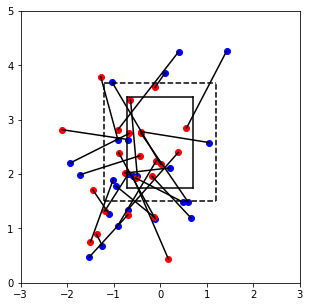

      PitchNo       Date  PAofInning  PitchofPA              Pitcher PitcherThrows        Batter BatterSide PitcherSet  Inning  Outs TaggedPitchType AutoPitchType       PitchCall      KorBB    HitType PlayResult  OutsOnPlay  RunsScored   RelSpeed  VertRelAngle  HorzRelAngle     SpinRate    SpinAxis   Tilt  RelHeight   RelSide  Extension  VertBreak  InducedVertBreak  HorzBreak  PlateLocHeight  PlateLocSide  ZoneSpeed  VertApprAngle  HorzApprAngle  ZoneTime  ExitSpeed      Angle   Direction  HitSpinRate  PositionAt110X  PositionAt110Y  PositionAt110Z  Distance  LastTrackedDistance     Bearing  HangTime       pfxx       pfxz        x0  y0        z0       vx0         vy0       vz0        ax0        ay0        az0 Count  Year  Month  PitchyStart  PitchxStart
10         11 2019-09-29           4          1     Marceaux, Landon         Right  Bianco, Drew      Right    Stretch       1     2          Slider        Slider  StrikeSwinging  Undefined  Undefined  Undefined           0           0 

In [ ]:
# define function to retrieve batter info using name and a pitch type
def Batter(name,pitch):

  # extract input batter's name from fall data
  data = fall[fall['Batter'] == name]

  # if an input pitch was specified, extract that fall data
  if pitch:
    data = data[data['TaggedPitchType'] == pitch]

  # extract only balls hit into play, not including foul balls into new dataset
  BallsInPlay = data[data['PitchCall'] == 'InPlay']
  BallsInPlay = BallsInPlay.sort_values(by=['ExitSpeed'], ascending=False)

  # create attributes for hit location coorindates (where in field ball was hit)
  BallsInPlay['xSpray'] = np.cos(np.radians(90-BallsInPlay['Bearing']))*BallsInPlay['Distance']
  BallsInPlay['ySpray'] = np.sin(np.radians(90-BallsInPlay['Bearing']))*BallsInPlay['Distance'] 

  # create dataset for pitches swung at and missed
  whiff = data[data['PitchCall'] == 'StrikeSwinging']

  # create variables for pitch movement
  Xstart = whiff['PitchxStart']
  Ystart = whiff['PitchyStart']
  Xend = whiff['PlateLocSide']
  Yend = whiff['PlateLocHeight']

  # set up Exit Speed meshgrid
  x = data['PlateLocSide']
  y = data['PlateLocHeight']
  z = data['ExitSpeed']
  xi = np.arange(-3,3,.01)
  yi = np.arange(0,5,.01)
  xi, yi = np.meshgrid(xi,yi)
  zi = griddata((x,y), z, (xi,yi), method='linear')

  # fill contour plot of strike zone exit speeds
  plt.figure(figsize=(5,5))
  plt.contourf(xi,yi,zi,100)
  plt.colorbar()
  plt.plot(x1,y1,'k',x2,y2,'k',x3,y3,'k',x4,y4,'k',
           x5,y5,'k--',x6,y6,'k--',x7,y7,'k--',x8,y8,'k--')
  plt.title('Exit Speed Heatmap')
  
  # plot spray chart of hit locations in field
  plt.figure(figsize=(10,7.5))
  plt.scatter(BallsInPlay['xSpray'],BallsInPlay['ySpray'],c='k')
  plt.xlim(-300,300)
  plt.ylim(-25,450)
  plt.plot(xf1,yf1,'k',xf2,yf2,'k')
  plt.title('Spray Chart')
  plt.tight_layout()
  plt.show()


  # print BallIn Play dataset in its entirety
  print(BallsInPlay.to_string())
  print()

  # plot balls swung at and missed with pitch movement
  fig1 = plt.figure(figsize=(5,5))
  plt.scatter(Xstart,Ystart,color='blue')
  plt.scatter(Xend,Yend,color='red')
  plt.plot([Xstart,Xend],[Ystart,Yend],'k-',
            x1,y1,'k',x2,y2,'k',x3,y3,'k',x4,y4,'k',
            x5,y5,'k--',x6,y6,'k--',x7,y7,'k--',x8,y8,'k--')
  plt.xlim(-3,3)
  plt.ylim(0,5)
  plt.show()
  print(whiff.to_string())
  print()

# show function results for batter Drew Bianco against all pitches
Batter('Bianco, Drew','')

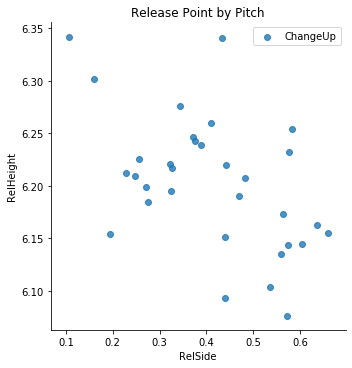

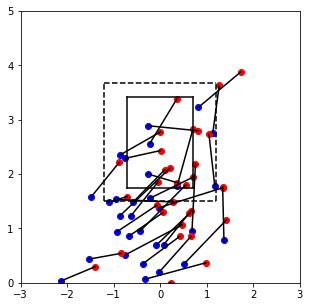

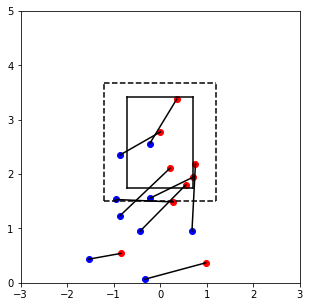

      PitchNo       Date  PAofInning  PitchofPA           Pitcher PitcherThrows             Batter BatterSide PitcherSet  Inning  Outs TaggedPitchType AutoPitchType       PitchCall      KorBB    HitType PlayResult  OutsOnPlay  RunsScored   RelSpeed  VertRelAngle  HorzRelAngle     SpinRate    SpinAxis   Tilt  RelHeight   RelSide  Extension  VertBreak  InducedVertBreak  HorzBreak  PlateLocHeight  PlateLocSide  ZoneSpeed  VertApprAngle  HorzApprAngle  ZoneTime  ExitSpeed  Angle  Direction  HitSpinRate  PositionAt110X  PositionAt110Y  PositionAt110Z  Distance  LastTrackedDistance  Bearing  HangTime      pfxx      pfxz        x0  y0        z0       vx0         vy0       vz0        ax0        ay0        az0 Count  Year  Month  PitchyStart  PitchxStart
3           4 2019-09-29           2          2  Marceaux, Landon         Right       Mathis, Zack       Left     Windup       1     1        ChangeUp      ChangeUp  StrikeSwinging  Undefined  Undefined  Undefined           0           0  83.83

In [ ]:
# define function to retrieve pitcher info using name and a ptch type
def Pitcher(name,pitch):

  # extract input pitcher's name from fall data
  pitcher = fall[fall['Pitcher'] == name]

  # extract input pitch type from fall data if specified
  if pitch:
    pitcher = pitcher[pitcher['TaggedPitchType'] == pitch]

  # create different variable types and dataframes
  x = pitcher['RelSide']
  y = pitcher['RelHeight']
  z = pitcher['TaggedPitchType']
  BallsInPlay = pitcher[pitcher['PitchCall'] == 'InPlay']
  BallsInPlay = BallsInPlay.sort_values(by='ExitSpeed', ascending=False)
  whiffs = pitcher[pitcher['PitchCall'] == 'StrikeSwinging']
  Xstart = pitcher['PitchxStart']
  Ystart = pitcher['PitchyStart']
  Xend = pitcher['PlateLocSide']
  Yend = pitcher['PlateLocHeight']
  XstartWhiffs = whiffs['PitchxStart']
  XendWhiffs = whiffs['PlateLocSide']
  YstartWhiffs = whiffs['PitchyStart']
  YendWhiffs = whiffs['PlateLocHeight']

  # create plot for release point
  sns.lmplot(x='RelSide', y='RelHeight', data=pitcher, fit_reg=False,
             hue='AutoPitchType', legend=False)
  plt.legend(loc='upper right')
  plt.title('Release Point by Pitch')

  # strike zone plot
  plt.figure(figsize=(5,5))
  plt.scatter(Xstart,Ystart,color='blue')
  plt.scatter(Xend,Yend,color='red')
  plt.plot([Xstart,Xend],[Ystart,Yend],'k-',
           x1,y1,'k',x2,y2,'k',x3,y3,'k',x4,y4,'k',
           x5,y5,'k--',x6,y6,'k--',x7,y7,'k--',x8,y8,'k--')
  plt.xlim(-3,3)
  plt.ylim(0,5)
  plt.show()

  # create whiff plot with pitch movement
  fig1 = plt.figure(figsize=(5,5))
  plt.scatter(XstartWhiffs,YstartWhiffs,color='blue')
  plt.scatter(XendWhiffs,YendWhiffs,color='red')
  plt.plot([XstartWhiffs,XendWhiffs],[YstartWhiffs,YendWhiffs],'k-',
            x1,y1,'k',x2,y2,'k',x3,y3,'k',x4,y4,'k',
            x5,y5,'k--',x6,y6,'k--',x7,y7,'k--',x8,y8,'k--')
  plt.xlim(-3,3)
  plt.ylim(0,5)
  plt.show()
  print(whiffs.to_string())
  print()

# show function results of pitcher Landon Marceaux changeups
Pitcher("Marceaux, Landon","ChangeUp")